In [27]:
# Collect the data
# import the dependencies we will need to run analysis
from datetime import datetime
import numpy as np 
from citipy import citipy
import requests
from config import weather_api_key
import pandas as pd 
import matplotlib.pyplot as plt 


In [28]:
# Use the NumPy module to generate more than 1,500 random latitudes and longitudes.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np. random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np. random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
coordinates = list(lat_lngs)

In [29]:
# Use the citipy module to list the nearest city to the latitudes and longitudes.
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

In [30]:
# Use the OpenWeatherMap API to request the current weather data from each unique city in your list.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 79.83,
  'feels_like': 78.39,
  'temp_min': 73,
  'temp_max': 86,
  'pressure': 1013,
  'humidity': 69},
 'visibility': 16093,
 'wind': {'speed': 14.99, 'deg': 100},
 'clouds': {'all': 75},
 'dt': 1593979657,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1593940418,
  'sunset': 1593995029},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [31]:
# Parse the JSON data from the API request.


In [32]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

hovo
Processing Record 16 of Set 4 | georgetown
Processing Record 17 of Set 4 | puerto ayora
Processing Record 18 of Set 4 | berlevag
Processing Record 19 of Set 4 | cazaje
City not found. Skipping...
Processing Record 20 of Set 4 | kaitangata
Processing Record 21 of Set 4 | iqaluit
Processing Record 22 of Set 4 | puerto vallarta
Processing Record 23 of Set 4 | nedjo
Processing Record 24 of Set 4 | kavaratti
Processing Record 25 of Set 4 | karasuk
Processing Record 26 of Set 4 | angoche
Processing Record 27 of Set 4 | yambio
Processing Record 28 of Set 4 | osinki
Processing Record 29 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 30 of Set 4 | lolua
City not found. Skipping...
Processing Record 31 of Set 4 | lebu
Processing Record 32 of Set 4 | madaoua
Processing Record 33 of Set 4 | bougouni
Processing Record 34 of Set 4 | nabire
Processing Record 35 of Set 4 | weihai
Processing Record 36 of Set 4 | drovyanaya
Processing Record 37 of Set 4 | padang
Processing Record

In [33]:
len(city_data)

563

In [34]:
# Collect the following data from the JSON file and add it to a DataFrame:

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Haines Junction,CA,2020-07-05 20:11:30,60.75,-137.51,68.47,36,80,7.56
1,Camana,PE,2020-07-05 20:10:03,-16.62,-72.71,63.34,70,48,7.83
2,Hailar,CN,2020-07-05 20:11:31,49.20,119.70,54.14,91,6,11.45
3,Rikitea,PF,2020-07-05 20:11:31,-23.12,-134.97,72.30,77,62,9.98
4,Puerto Quijarro,BO,2020-07-05 20:11:31,-17.78,-57.77,93.79,28,0,6.60
5,Minggang,CN,2020-07-05 20:11:31,32.46,114.05,76.10,65,86,5.53
6,Guerrero Negro,MX,2020-07-05 20:08:26,27.98,-114.06,80.96,47,0,16.73
7,Baykit,RU,2020-07-05 20:11:32,61.67,96.37,61.65,53,100,2.24
8,Tateyama,JP,2020-07-05 20:11:32,34.98,139.87,75.99,100,100,10.00
9,Busselton,AU,2020-07-05 20:11:32,-33.65,115.33,54.00,82,0,14.97


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
# Exploratory Analysis with visualization

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [38]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1593980037.331882

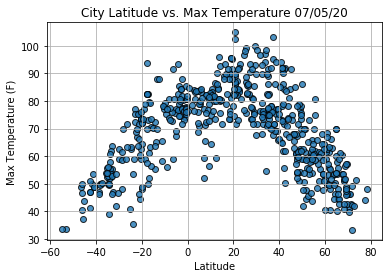

In [39]:
# Create scatter plots of the weather data for the following comparisons:

# Latitude versus temperature
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

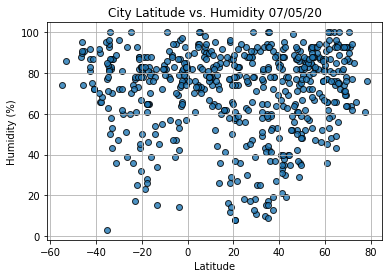

In [44]:
# Latitude versus humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

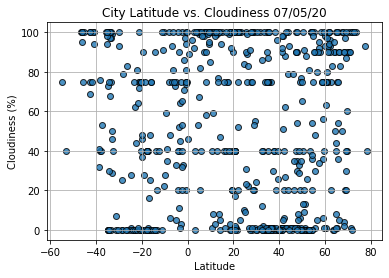

In [54]:
# Latitude versus cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, 
            cloudiness,
            edgecolors='black',
            linewidths=1,
            marker='o',
            alpha=0.8,
            label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig3.png")
# Show plot
plt.show()

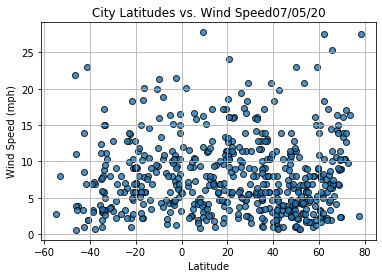

In [53]:
# Latitude versus wind speed
# Build the scatterplot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolors='black',
            linewidths=1,
            alpha=0.8,
            marker='o',
            label='Cities'
)
# Incorporate the other graph properties
plt.title("City Latitudes vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
# Save figure
plt.savefig('weather_data/Fig4.png')
# Show plot
plt.show()


In [40]:
# Determine the correlations for the following weather data:

# Latitude and temperature
# Latitude and humidity
# Latitude and cloudiness
# Latitude and wind speed

In [41]:
# Create a series of heatmaps using the Google Maps and Places API that showcases the following:

# Latitude and temperature
# Latitude and humidity
# Latitude and cloudiness
# Latitude and wind speed

In [42]:
# Visualize Travel Data

In [43]:
# Create a heatmap with pop-up markers that can display information on specific cities based on a customer’s travel preferences. Complete these steps:

# Filter the Pandas DataFrame based on user inputs for a minimum and maximum temperature.
# Create a heatmap for the new DataFrame.
# Find a hotel from the cities’ coordinates using Google’s Maps and Places API, and Search Nearby feature.
# Store the name of the first hotel in the DataFrame.
# Add pop-up markers to the heatmap that display information about the city, current maximum temperature, and a hotel in the city.